## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

(35.0, 50.0)

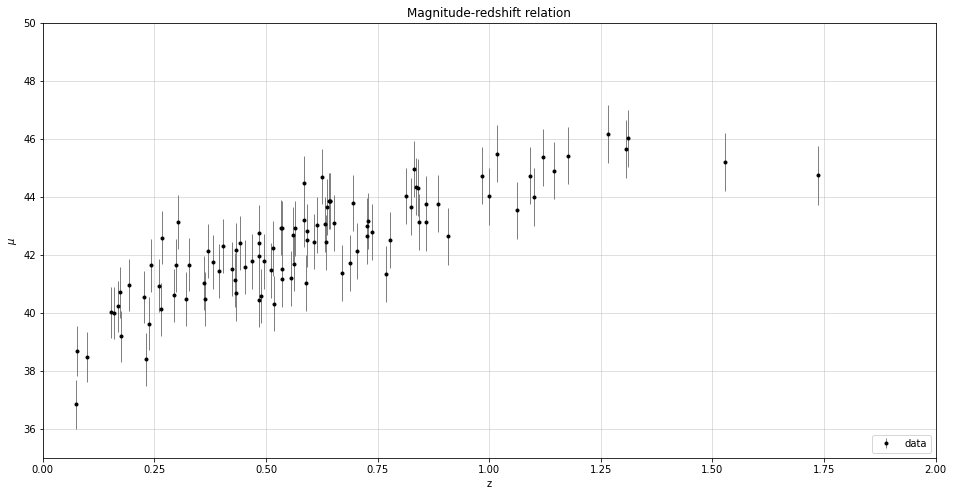

In [1]:
#synthetic, realistic supernova data
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")
plt.xlim(0,2)
plt.ylim(35,50)

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?


(35.0, 50.0)

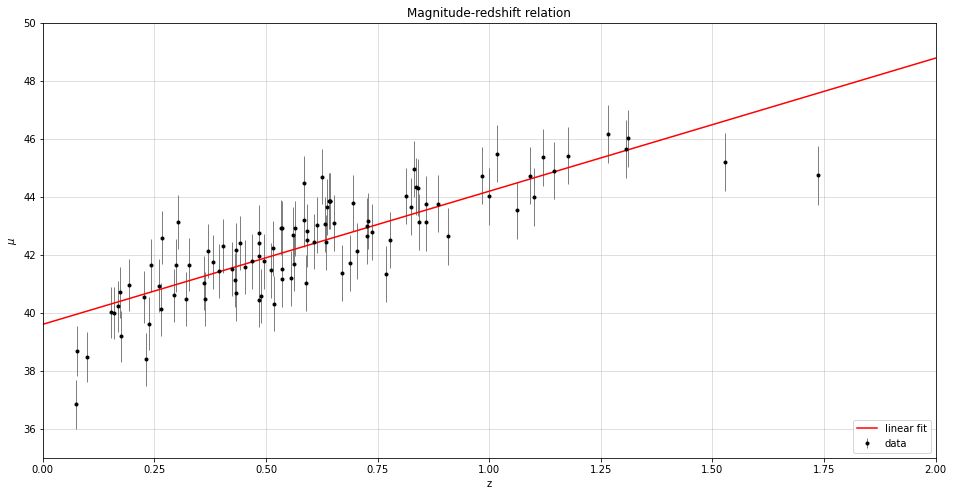

In [2]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(z_sample.reshape(-1,1), mu_sample.reshape(-1,1), dmu)

intercept = lin_reg.intercept_
slope = lin_reg.coef_

x_plot = np.linspace(0, 2, 1000).reshape(-1,1)
mu_fit = lin_reg.predict(x_plot)

plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_plot, intercept[0] + slope[0]*x_plot, color = "red", label = "linear fit")
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")
plt.xlim(0,2)
plt.ylim(35,50)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


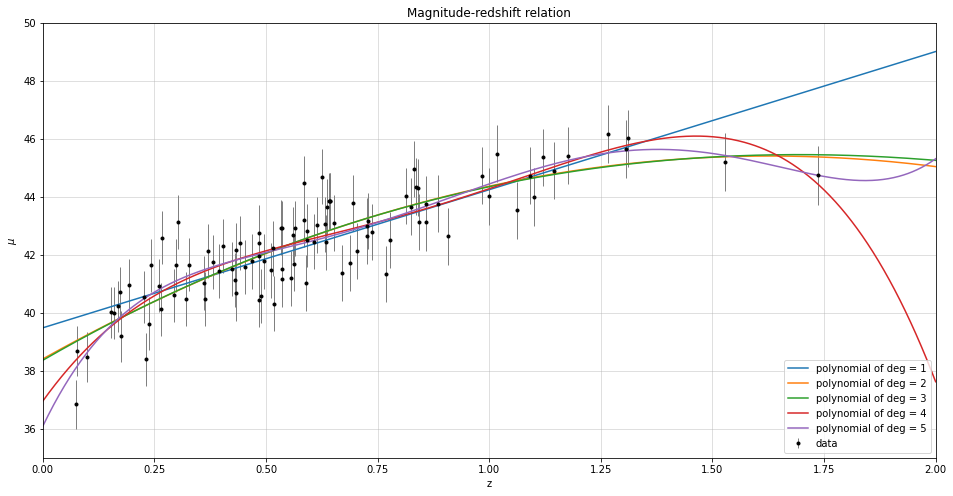

In [3]:
#Polynomial Regression
from astroML.linear_model import PolynomialRegression

z = z_sample.reshape(100, 1)
#mu = mu_sample.reshape(100, 1)

deg = 5
plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

for deg in range(1,6):
    model = PolynomialRegression(deg)
    model.fit(z, mu_sample, dmu) 
    mu_predict = model.predict(x_plot)
    Nconstraints = deg + 1
        
    plt.plot(x_plot, mu_predict, label = "polynomial of deg = " + str(deg))
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.legend(loc='lower right')
    plt.grid(alpha = 0.5)
    plt.title("Magnitude-redshift relation")
    plt.xlim(0,2)
    plt.ylim(35,50)
    

In [4]:
#Basis function regression
from astroML.linear_model import BasisFunctionRegression

#kernel regression test
from astroML.linear_model import NadarayaWatson

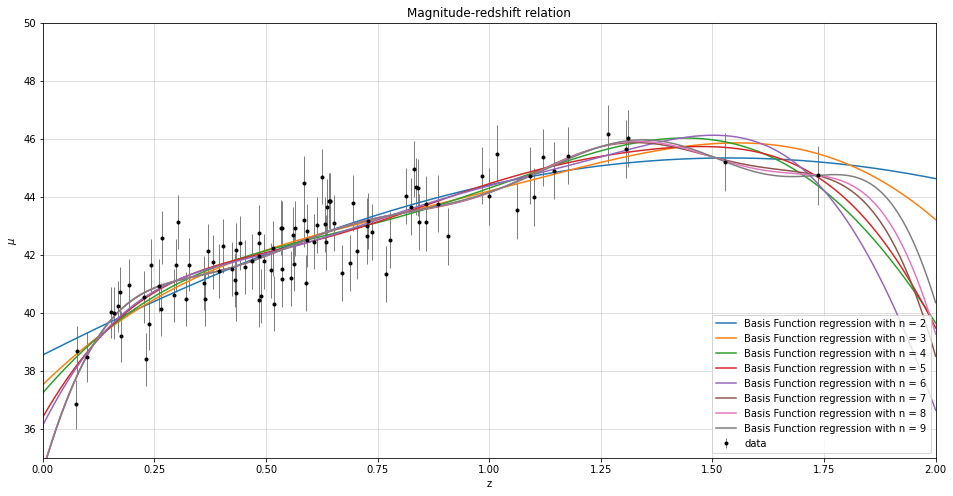

In [12]:
#Basis function regression

plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
for deg in range(2,10):

    # mean positions of the 10 Gaussians in the model
    mu_mean = np.linspace(0,2,deg)[:, None]
    # widths of these Gaussians
    mu_sigma = mu_mean[1] - mu_mean[0]

    model = BasisFunctionRegression('gaussian', mu=mu_mean, sigma=mu_sigma)
    model.fit(z, mu_sample, dmu)

    mu_pred = model.predict(x_plot)
    
    
    plt.plot(x_plot, mu_pred, label = "Basis Function regression with n = " + str(deg))
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.legend(loc='lower right')
    plt.grid(alpha = 0.5)
    plt.title("Magnitude-redshift relation")
    plt.xlim(0,2)
    plt.ylim(35,50)


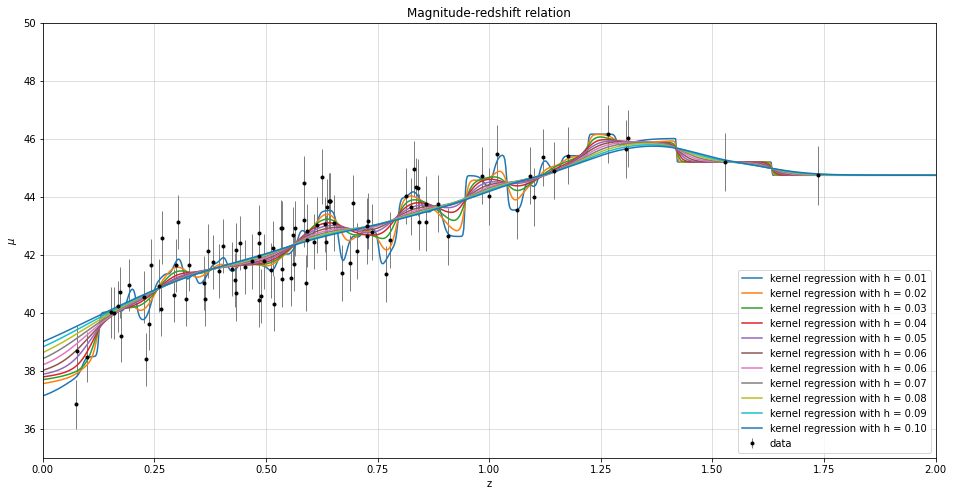

In [10]:
#kernel regression test

h = np.linspace(0.01, 0.1, 11)   


plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

for h_i in range(len(h)):
    model = NadarayaWatson(kernel='gaussian', h=h[h_i])
    model.fit(z, mu_sample)

    mu_pred = model.predict(x_plot)
    
    plt.plot(x_plot, mu_pred, label = "kernel regression with h = " + '{:,.2f}'.format(h[h_i]))
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.legend(loc='lower right')
    plt.grid(alpha = 0.5)
    plt.title("Magnitude-redshift relation")
    plt.xlim(0,2)
    plt.ylim(35,50)

### guess:
- order 1 is underfitting
- order 4 and above are overfitting
- order 2 or 3 may be the best fit

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [14]:
z_train, z_val, mudmu_train, mudmu_val = train_test_split(z,np.array([mu_sample, dmu]).T, train_size=0.7, random_state = 27)
mu_train, dmu_train = mudmu_train.T
mu_val, dmu_val = mudmu_val.T

The best degree of the model is 2


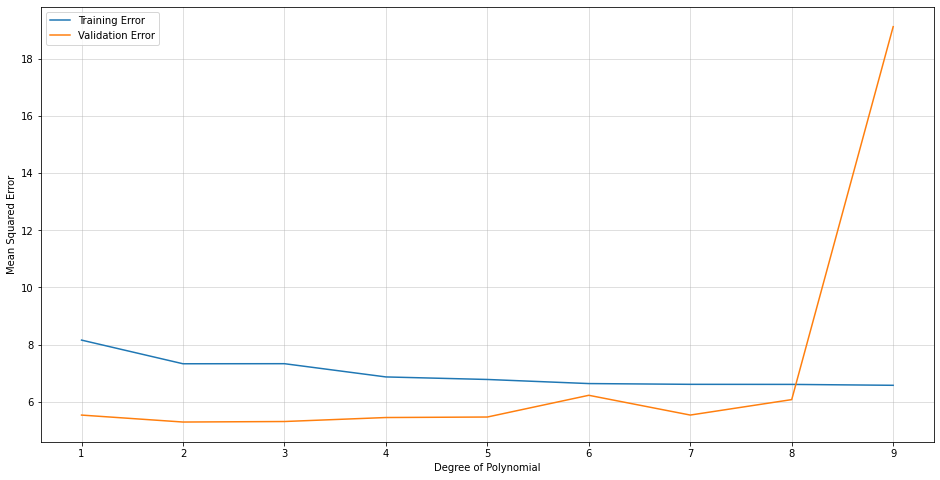

The best n of the model is 2


<Figure size 432x288 with 0 Axes>

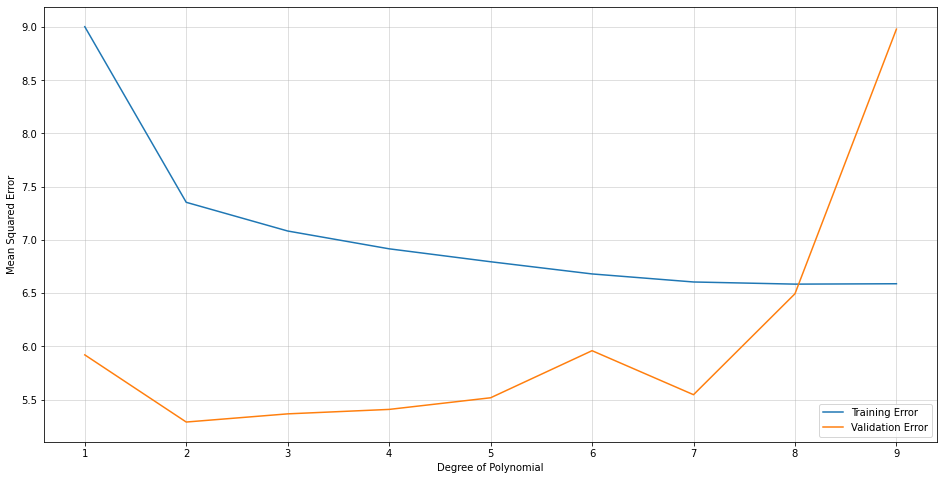

The best bandwidth of the kernel is 0.020000000000000004


<Figure size 432x288 with 0 Axes>

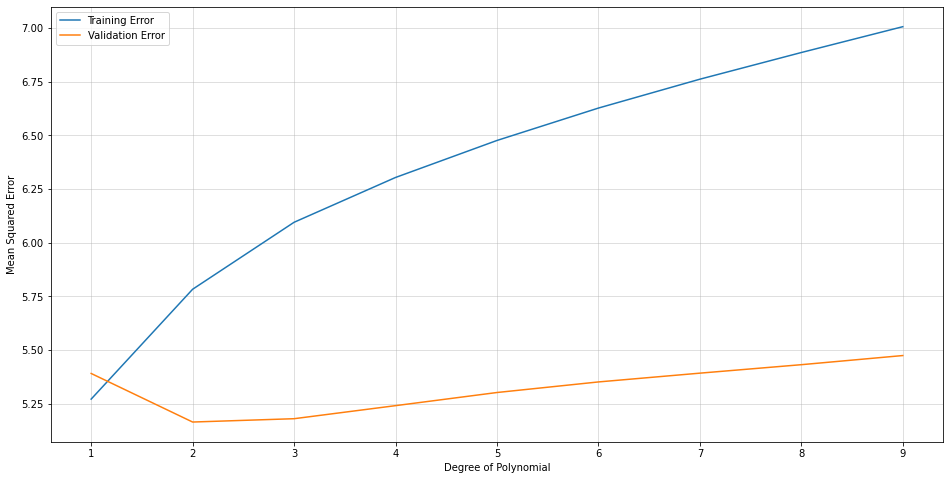

(35.0, 50.0)

<Figure size 432x288 with 0 Axes>

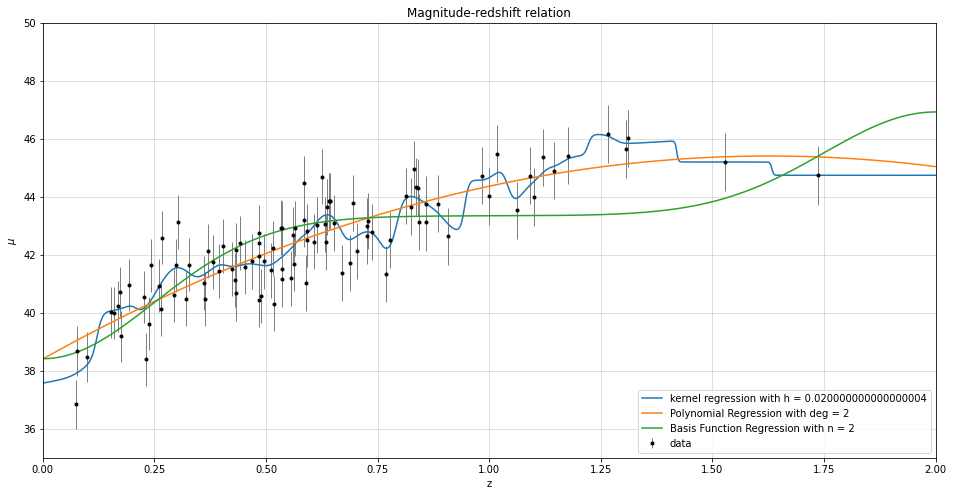

In [17]:
dmin = 1
dmax = 10
h = np.linspace(0.01, 0.1, dmax)
z_train, z_val, mudmu_train, mudmu_val = train_test_split(z,np.array([mu_sample, dmu]).T, train_size=0.7, random_state = 27)
mu_train, dmu_train = mudmu_train.T
mu_val, mudmu_val = mudmu_val.T    

#training and validation MSEs
training_error = np.empty([int(dmax-dmin), 3])
validation_error = np.empty([int(dmax-dmin), 3])


n_deg = 0
for deg in range(dmin, dmax):
    
    kernel = 'gaussian'
    mu_mean = np.linspace(0,2,deg)[:, None] 
    if deg == 1:
        sigma = 1
    if deg > 1:
        sigma = mu_mean[1]- mu_mean[0]

    h_i = h[deg]
    
    regression_method = ({"Polynomial Regression": PolynomialRegression(degree = deg), 
                "Basis Function Regression": BasisFunctionRegression('gaussian', mu = mu_mean, sigma=sigma),
                "Nadaraya-Watson Kernel Regression": NadarayaWatson(kernel= 'gaussian', h= h_i)
                })
    n_method = 0
    for name, method in regression_method.items():

        #regression model
        reg = method

        # Fit the model on the train data
        reg.fit(z_train, mu_train, dmu_train)

        # Use the trained model to predict on the transformed train data
        mu_train_pred = reg.predict(z_train)       

        # Compute the MSE on the train predictions
        training_error[n_deg][n_method] = (np.sqrt(np.sum((mu_train - mu_train_pred)**2)))

        # Use the trained model to predict on the transformed validation data
        mu_val_pred = reg.predict(z_val)

        # Compute the MSE on the validation predictions
        validation_error[n_deg][n_method] = (np.sqrt(np.sum((mu_val - mu_val_pred)**2)))

        n_method += 1
    n_deg += 1

best_deg = []
for n_method in range(3):  

    best_degree = np.argmin(validation_error[:, n_method])
    
    if n_method == 0 : 
        print("The best degree of the model is", best_degree +1)
    if n_method == 1 : 
        print("The best n of the model is", best_degree+1)
    if n_method == 2 :
        print("The best bandwidth of the kernel is", h[best_degree])
        
    # Plot the errors as a function of increasing d 
    plt.figure(figsize=(16, 8))
    
    plt.plot(np.arange(dmin, dmax), training_error[:,n_method], label="Training Error")
    plt.plot(np.arange(dmin, dmax), validation_error[:,n_method], label="Validation Error")

    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc = 'best')
    #plt.yscale('log')
    plt.grid(alpha = 0.5)
    plt.show()
    plt.clf();
    best_deg.append(best_degree)

plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

model_nw = NadarayaWatson(kernel='gaussian', h=h[best_deg[2]])
model_nw.fit(z, mu_sample)

mu_pred_nw = model_nw.predict(x_plot)

model_pr = PolynomialRegression(best_deg[0]+1)
model_pr.fit(z, mu_sample, dmu) 
mu_pred_pr = model_pr.predict(x_plot)

mu_mean = np.linspace(0,2,best_deg[1]+1)[:, None]
if best_deg[1] == 1:
    sigma = 1
if best_deg[1] > 1:
    sigma = mu_mean[1]- mu_mean[0]
    
model_bfr = BasisFunctionRegression('gaussian', mu=mu_mean, sigma=mu_sigma)
model_bfr.fit(z, mu_sample, dmu)

mu_pred_bfr = model_bfr.predict(x_plot)

plt.plot(x_plot, mu_pred_nw, label = "kernel regression with h = " + str(h[best_deg[2]]))
plt.plot(x_plot, mu_pred_pr, label = "Polynomial Regression with deg = " + str(best_deg[0] +1))
plt.plot(x_plot, mu_pred_bfr, label = "Basis Function Regression with n = " + str(best_deg[1] +1))

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")
plt.xlim(0,2)
plt.ylim(35,50)

### SN-z relation with GPR

First let's fit our supernova synthetic data from last time using GPR.

- The key ingrediente in getting a good GPR fit is the choice of the kernel and its parameters.
- Check out what's available in the `kernels` submodule of [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)
- *Hint*. Radial-basis function kernel (aka squared-exponential kernel) is a standard choice in the GPR world.
- Plot the expectation value of the fit as well as the resulting 1-$\sigma$ and 2-$\sigma$ contours.
- Interpret the results.

*Note*. We have time constraints, so feel free to tweak the hyperparameters manually while in class. But, of course, a publication-quality result will require a cross-validation analysis. (Do this at home before the exam?)


In [18]:
from astropy.constants import pc, c
from astropy.cosmology import FLRW as flrw
import scipy.integrate as integrate
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
import dynesty
import scipy

In [19]:
kernel = kernels.RBF(3.5, (0.01, 100)) * kernels.ConstantKernel(1, (0.01, 100))
gp = GaussianProcessRegressor(kernel = kernel, alpha=dmu**2, random_state = 0, normalize_y=True)
gp.fit(z_sample.reshape(-1,1), mu_sample.reshape(-1,1))
predict, predict_std = gp.predict(z_sample.reshape(-1,1), return_std = True)

(36.0, 48.0)

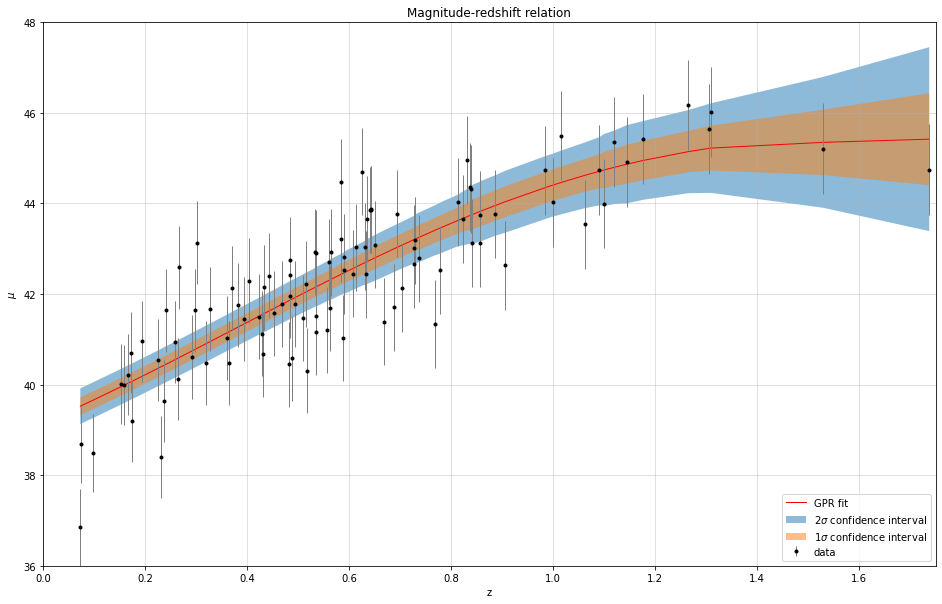

In [20]:
plt.figure(figsize=(16, 10))

plt.plot(np.sort(z_sample), np.sort(predict[:,0]), color='red', lw=1, label='GPR fit')
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.fill_between(
    np.sort(z_sample).ravel(),
    np.sort(predict[:,0]) - 2 * np.sort(predict_std),
    np.sort(predict[:,0]) + 2 * np.sort(predict_std),
    alpha=0.5,
    label=r"2$\sigma$ confidence interval",
)
plt.fill_between(
    np.sort(z_sample).ravel(),
    np.sort(predict[:,0]) - np.sort(predict_std),
    np.sort(predict[:,0]) + np.sort(predict_std),
    alpha=0.5,
    label=r"1$\sigma$ confidence interval",
)

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")
plt.xlim(0,1.75)
plt.ylim(36, 48)


We now have a suite of *data-drive predictive models* for our supernova dataset. That is: we can faithfully predict how a future redshift/distance measurement will look like given the current sample.

This is already great and these kind of tools are immensely useful in a variety of contexts (also involving a lot of money: suppose you want to predict how much a give financial asset will perform on tomorrow's stock market... You  might not really care about expressing the underlying financial model in simple terms, as long as your investments are profitable).

For the case of supernovae, however, we have do have physical theory which is $\Lambda$CDM.

- First, refresh your cosmology and write down the predicted relationship between the distance module $\mu$ and the redshift $\sigma$. *Hint* I always forget these things, my to-go reference is [Hogg (2010)](https://arxiv.org/abs/astro-ph/9905116). I got:

$$\mu = 5 \log \left( \frac{c/H_0} {10 {\rm pc}}(1+z)\int_0^z \frac{dz'}{\sqrt{\Omega_m (1+z^3)+\Omega_\Lambda}} \right) $$


- Assuming a flat Universe,  we have a parametric non-linear model for $\mu(z)$ that depends on two parameters, the Hubble constant $H_0$ and the matter content of the Universe $\Omega_m$
- It's a very non-linear model. Fir it to the data (however you want to do it).
- What are the measured value of $H_0$ and $\Omega_m$. Are they correlated?
- How would a model without dark energy (i.e. $\Omega_m=1$) perform? Do these data contain evidence of dark energy?


In [22]:
c_km_s = c.to('km/s').value

from astropy.cosmology import LambdaCDM
def mu_cosmo_astropy(u, z, dark_energy):
    if dark_energy == True:
        
        Om_par, H0_par = u
        cosmo_tmp = LambdaCDM(H0_par, Om_par, Ode0=1-Om_par)
        return cosmo_tmp.distmod(z).value
    
    if dark_energy == False:
        H0_par = float(u)
        Om = 1
        cosmo_tmp = LambdaCDM(H0_par, Om0 = Om, Ode0=0)
        return cosmo_tmp.distmod(z).value        


def mu_cosmo(u, z, dark_energy):
    
    I = np.empty(len(z))
    
    if dark_energy == True:
        
        Om_par, H0_par = u
        func = lambda zv: (Om_par*(1+zv**3)+(1 - Om_par))**(-1/2) 
        
    if dark_energy == False:
        H0_par = u
        Om_par = 1
        func = lambda zv: (Om_par*(1+zv**3)+(1 - Om_par))**(-1/2)
        
    for i in range(len(I)):
        
        I[i] = (1+z[i])*integrate.quad(func,0,z[i])[0]
        
    return  5*np.log10(((c_km_s/H0_par)/(10*1e-6))*I) 

def prior(u, mu_cosmo_astropy , dark_energy):
    if dark_energy == True:
        omega_m, H0_par = u
        v = u
        v[1] = 100*u[1]
    
    if dark_energy == False:
        H0_par = u
        v = u
        v = 100*u
    return v

def log_prior(u, dark_energy):
    if dark_energy == True:
        omega_m, H0_par = u
        if 0 < omega_m < 1 and 0.0 < H0_par < 100:
            return 0.0
        return -np.inf
    if dark_energy == False:
        H0_par = u
        if 0.0 < H0_par < 100:
            return 0.0
        return -np.inf        

def log_likelihood(v, z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy):
    if dark_energy == True:
        Om_par, H0_par = v
    if dark_energy == False:
        H0_par = float(v)
        
    mu_pred = mu_cosmo_astropy(v, z_sample, dark_energy)
    res = (mu_pred - mu_sample)**2/(dmu**2)
    loglike = -0.5*np.sum(res + np.log(2*np.pi*dmu**2))
    return loglike

def log_probability(u, z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy):
    lp = log_prior(u, dark_energy)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(u, z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy)

In [23]:
dark_energy = True
ndim = 2
sampler = dynesty.NestedSampler(log_likelihood, prior, ndim, nlives = 100, logl_args=[z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy], ptform_args=[mu_cosmo_astropy, dark_energy])
sampler.run_nested()
results = sampler.results

1917it [00:24, 77.32it/s, +500 | bound: 1 | nc: 1 | ncall: 18704 | eff(%): 12.922 | loglstar:   -inf < -132.814 <    inf | logz: -135.789 +/-  0.081 | dlogz:  0.001 >  0.509]


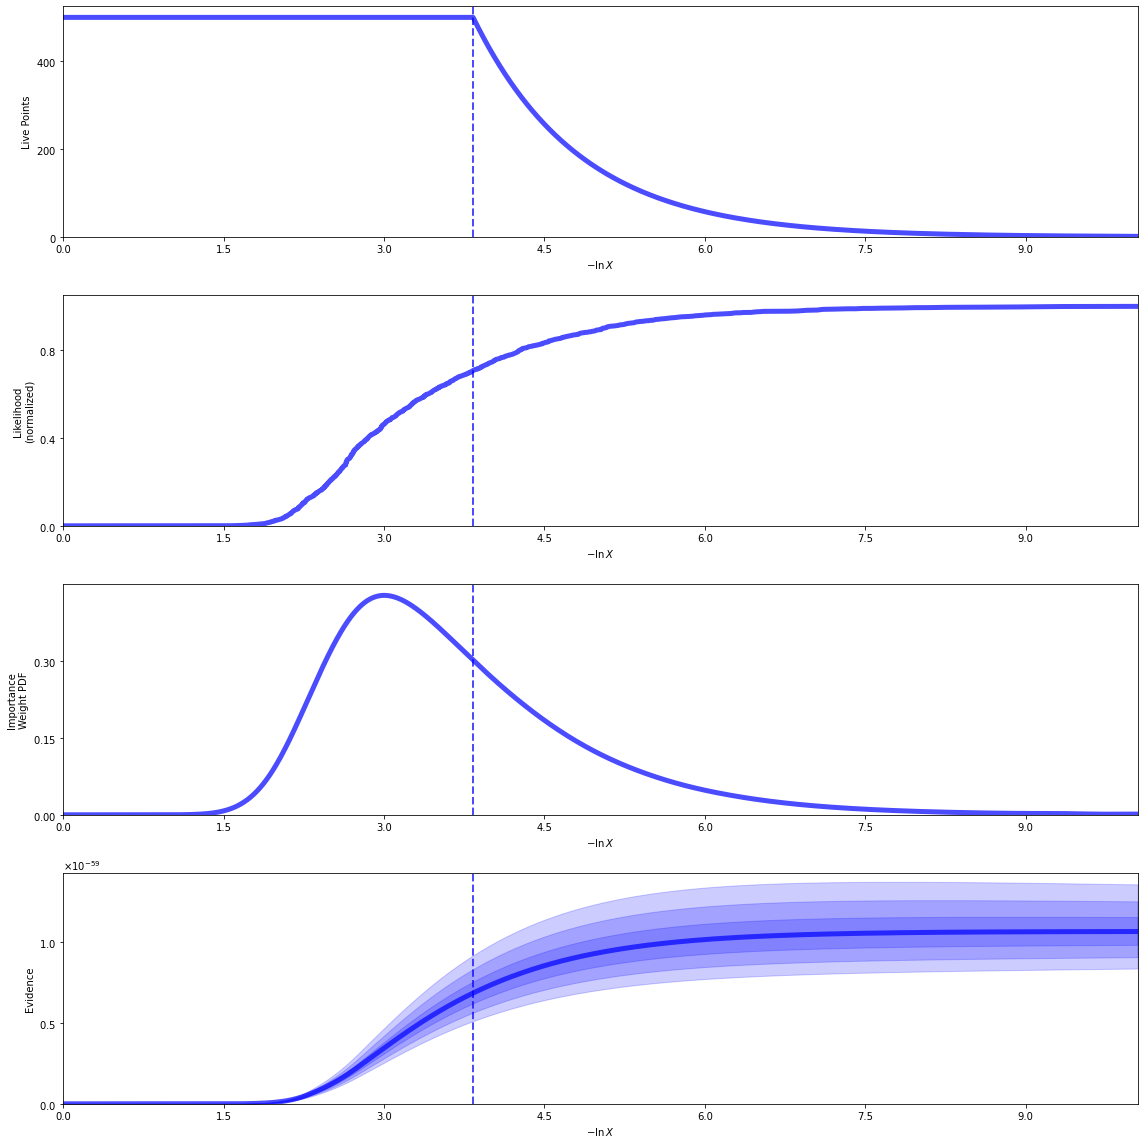

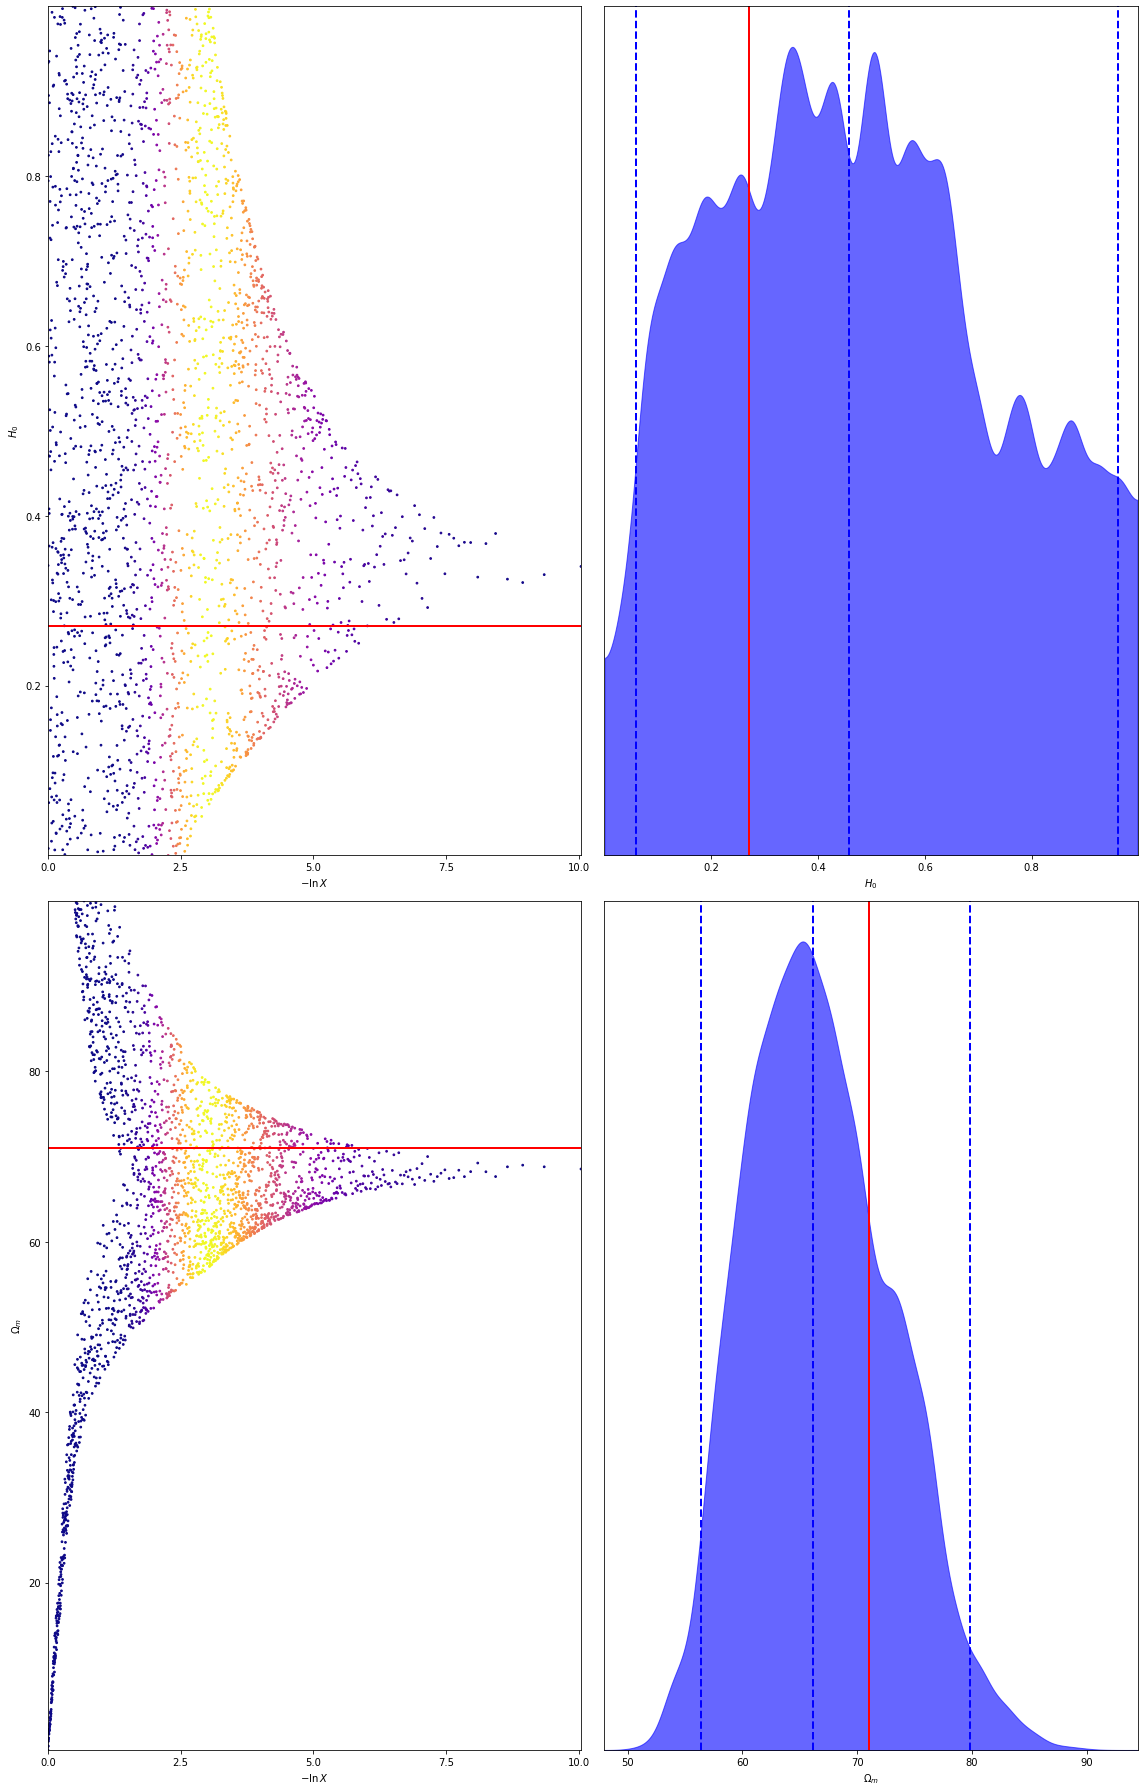

In [25]:
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import corner

dyplot.runplot(results)
plt.tight_layout()
sample = results.samples
w = np.exp(results.logwt - results.logz[-1])

labels = [r'$H_0$', r'$\Omega_m$']
truths = [0.27, 71]
fig, axes = dyplot.traceplot(results, labels=labels, truths=truths,
                             fig=plt.subplots(2, 2, figsize=(16, 25)))
fig.tight_layout()

1sigma regions:
 [[0.19017131986306235, 0.7705578422909115], [60.41976851097606, 73.53292436135924]]
mean values =  [ 0.47453845 66.7582081 ]
covariance =  [[ 0.06548521 -1.3904895 ]
 [-1.3904895  38.80635194]]


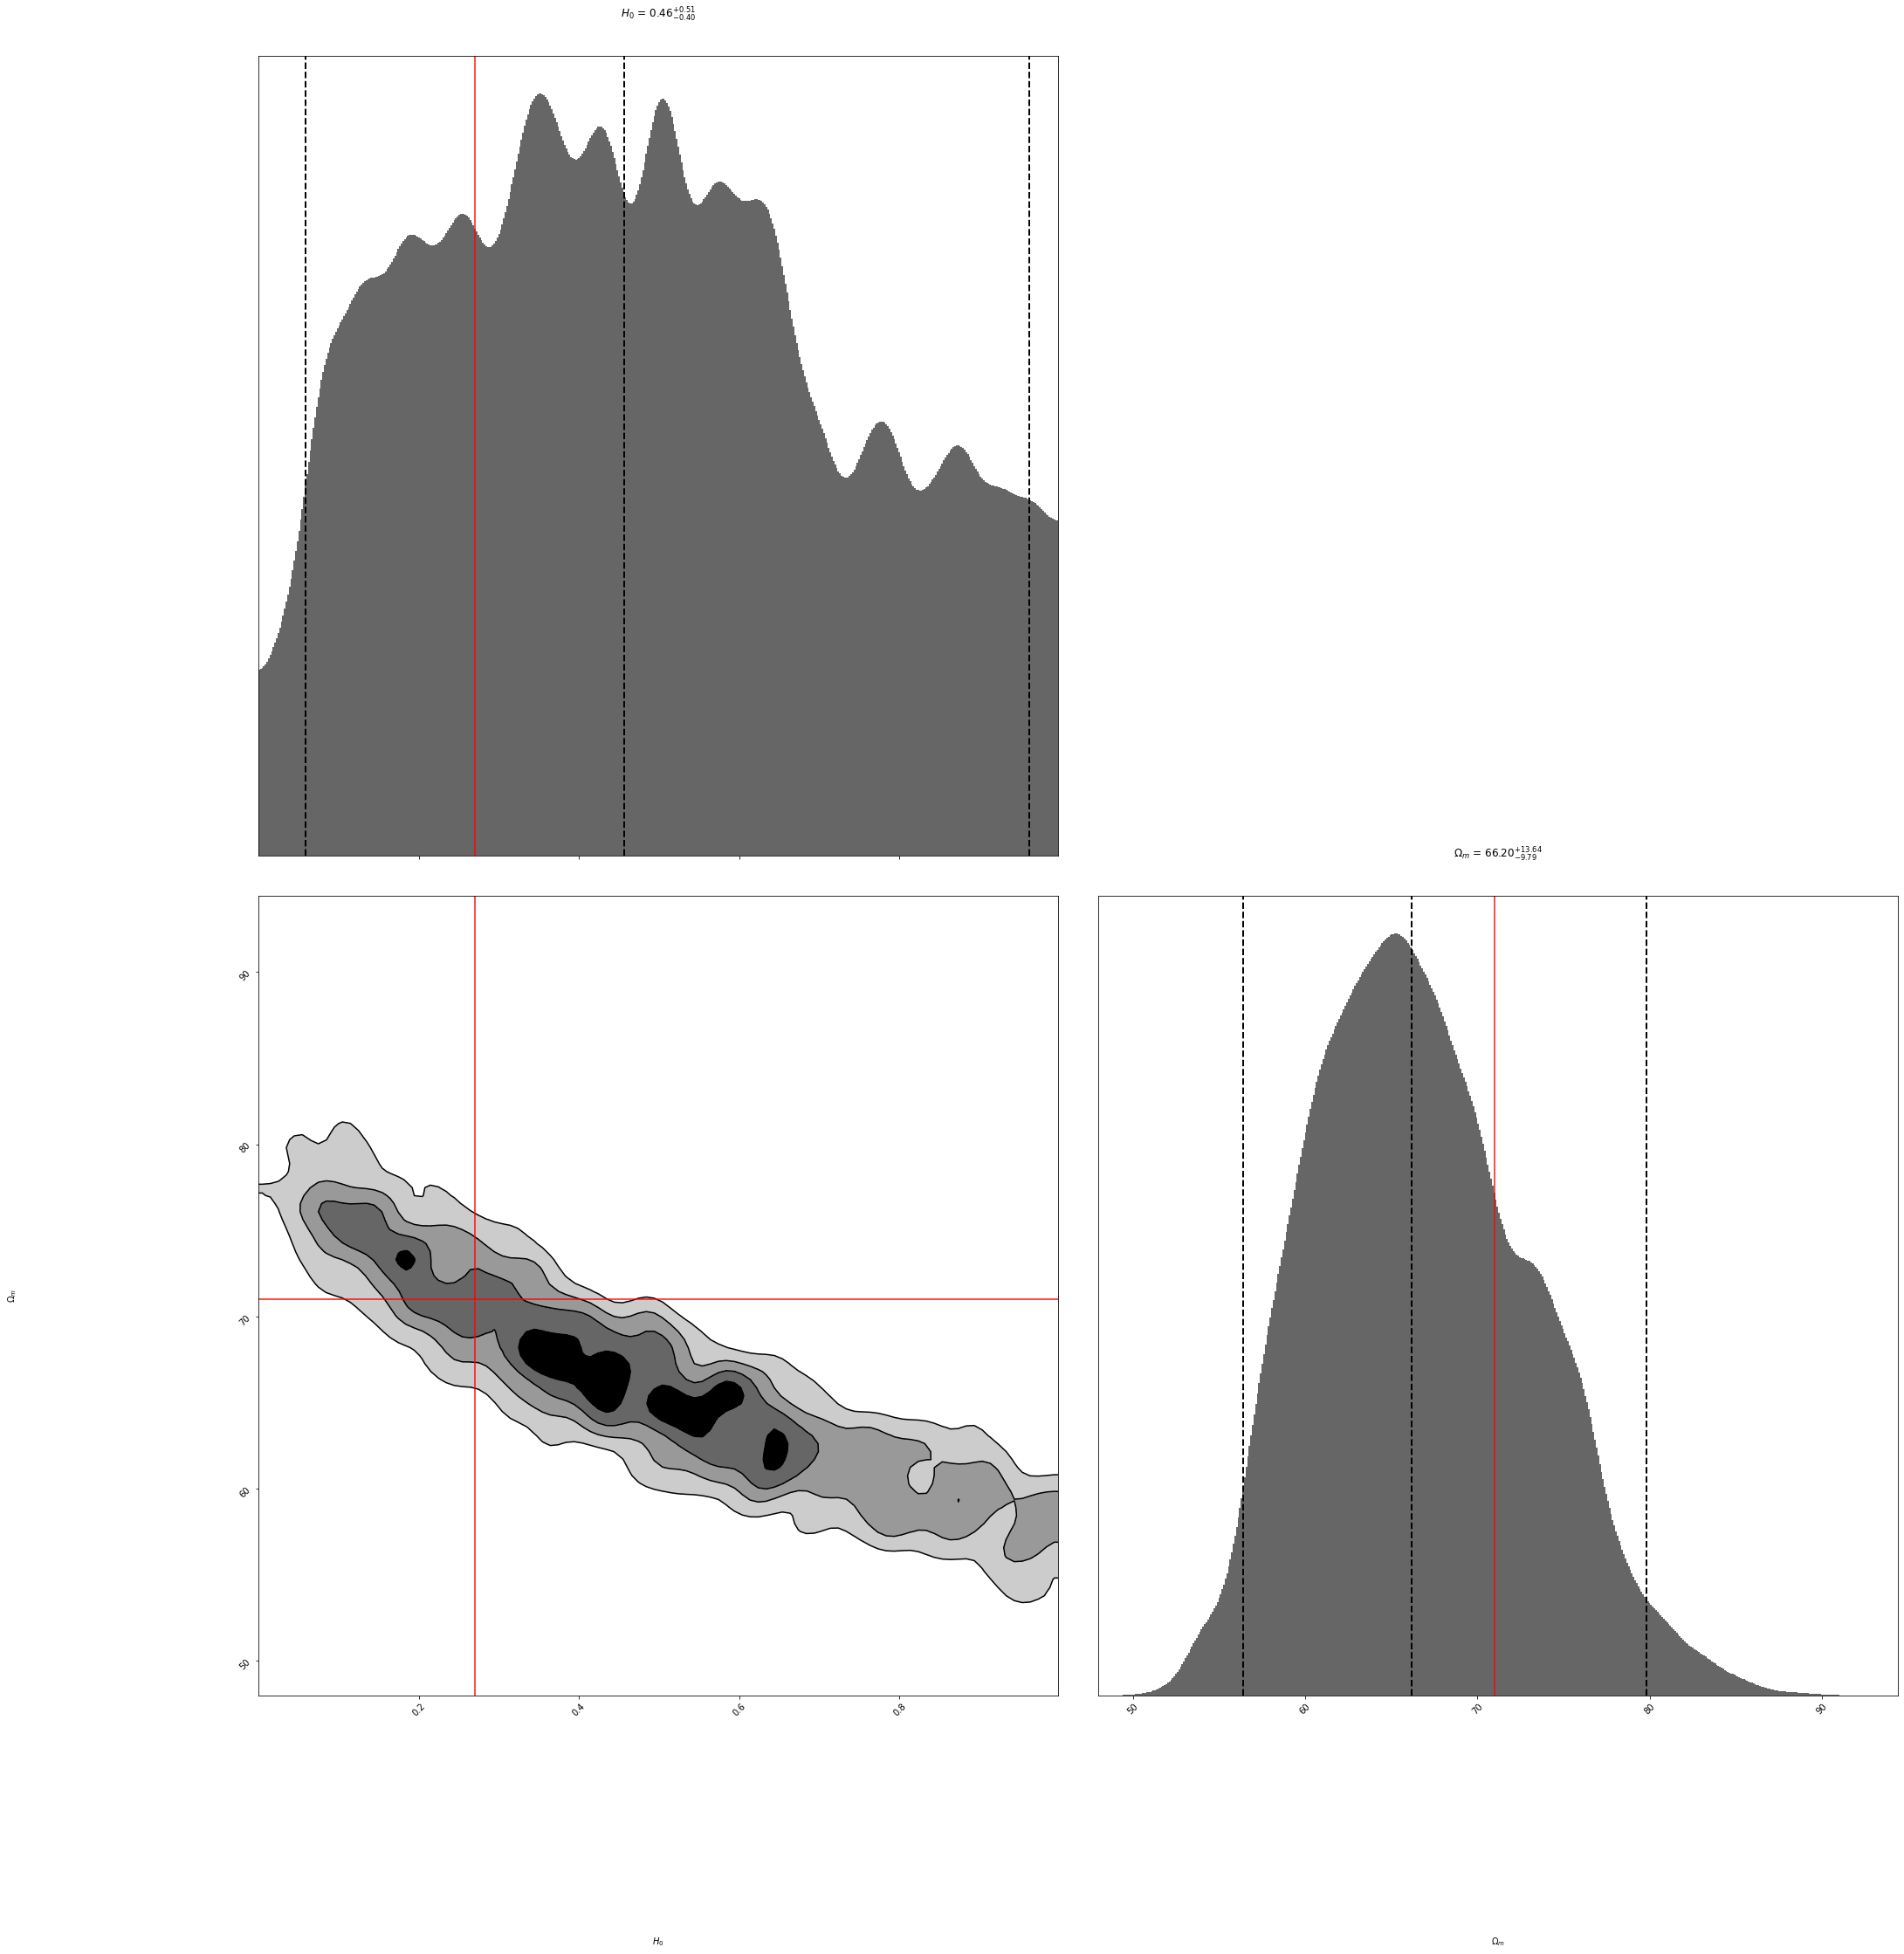

In [26]:
mean, cov = dyfunc.mean_and_cov(sample, w)
confidence_68 = [dyfunc.quantile(s, [0.16, 0.84], weights=w)
             for s in sample.T]
print('1sigma regions:\n ' + str(confidence_68))

fig, axes = dyplot.cornerplot(results, truths=truths, show_titles=True, 
                              title_kwargs={'y': 1.04}, labels=labels,
                              fig=plt.subplots(2, 2, figsize=(35, 35)))

print("mean values = ", mean)
print("covariance = ", cov)

### Fitting with emcee

In [27]:
import emcee

dark_energy = True

start = np.array([0.3, 70])
pos = start + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

sampler_emcee = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy)
)
sampler_emcee.run_mcmc(pos, 5000)


State([[5.86314482e-02 8.25790496e+01]
 [1.19848589e-01 7.69405603e+01]
 [9.53251671e-02 7.30500266e+01]
 [1.68102538e-01 7.44221557e+01]
 [4.35180540e-01 6.63616201e+01]
 [2.88945556e-02 7.60509494e+01]
 [1.87610650e-01 7.27411463e+01]
 [1.22998147e-01 7.87855597e+01]
 [4.55479264e-01 6.34769529e+01]
 [6.37128939e-01 6.17449602e+01]
 [2.17243425e-01 7.00913532e+01]
 [1.04253616e-01 7.19020577e+01]
 [8.55010612e-01 5.67585118e+01]
 [4.98058003e-01 6.85705682e+01]
 [5.10445807e-01 6.58451918e+01]
 [2.11286428e-01 7.22203021e+01]
 [6.65693870e-01 5.70968864e+01]
 [1.85684524e-01 7.65422587e+01]
 [3.88735832e-01 6.90573637e+01]
 [8.14647172e-01 5.85632690e+01]
 [9.25084867e-01 6.00820309e+01]
 [8.74475261e-01 5.78732455e+01]
 [1.63870010e-02 8.26791157e+01]
 [2.30939261e-01 7.03578568e+01]
 [2.57878364e-01 7.17206299e+01]
 [4.55064727e-01 6.42198501e+01]
 [1.59694825e-01 7.34600041e+01]
 [9.01482099e-01 5.55130586e+01]
 [6.69086213e-01 6.20543630e+01]
 [3.12535280e-01 6.68171395e+01]
 [7.

[ 0.45726811 67.18217392]
[35.26799098 33.87291367]
(10432, 2)


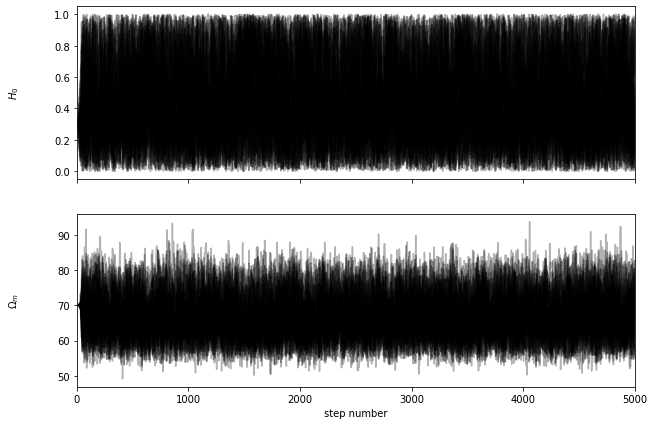

In [30]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples_emcee = sampler_emcee.get_chain()
labels = ["$H_0$", "$\Omega_m$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_emcee[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_emcee))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
mean_emcee = np.array([np.mean(samples_emcee[:, :, i]) for i in range(ndim)])
print(mean_emcee)

tau = sampler_emcee.get_autocorr_time()
print(tau)

flat_samples = sampler_emcee.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

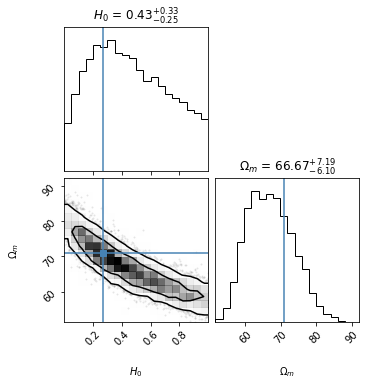

In [31]:
import corner

fig = corner.corner(
    flat_samples, levels=[0.68,0.95], labels=labels, truths=truths, show_titles=True
);

In [32]:
## remove dark energy from model
dark_energy = False
ndim = 1
sampler = dynesty.NestedSampler(log_likelihood, prior, ndim, nlives = 100, logl_args=[z_sample, mu_sample, dmu, mu_cosmo_astropy, dark_energy], ptform_args=[mu_cosmo_astropy, dark_energy])
sampler.run_nested()
results_node = sampler.results


1809it [00:15, 117.27it/s, +500 | bound: 1 | nc: 1 | ncall: 17630 | eff(%): 13.097 | loglstar:   -inf < -133.530 <    inf | logz: -136.241 +/-  0.068 | dlogz:  0.001 >  0.509]


mean values =  [57.69848728]
covariance =  [[6.24692561]]


/home/sara/.local/lib/python3.9/site-packages/astropy/cosmology/flrw.py:1280: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


(35.0, 50.0)

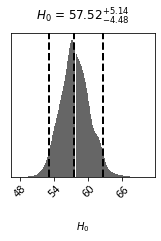

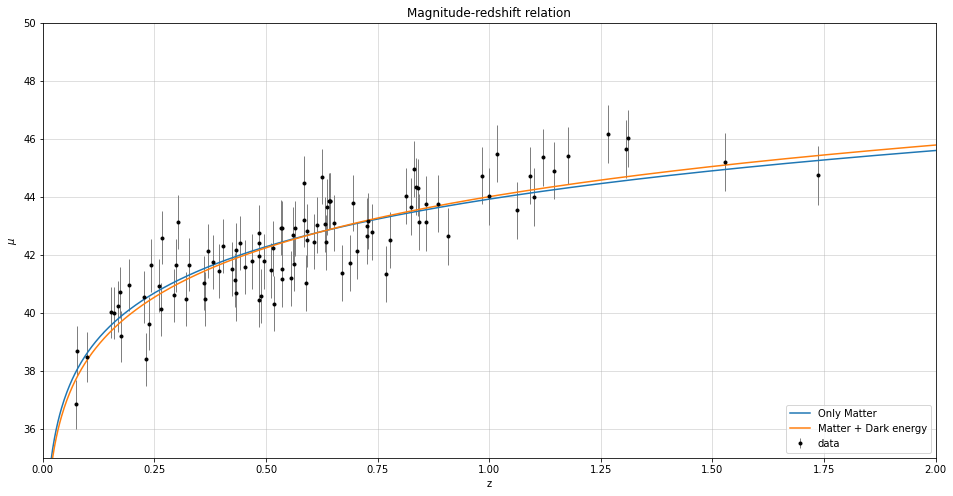

In [33]:
sample_node = results_node.samples
w_node = np.exp(results_node.logwt - results_node.logz[-1])


mean_node, cov_node = dyfunc.mean_and_cov(sample_node, w_node)

print("mean values = ", mean_node)
print("covariance = ", cov_node)

fig, axes = dyplot.cornerplot(results_node,  show_titles=True, 
                              title_kwargs={'y': 1.04}, labels=labels)


#plot_fit using values from nested sampling

plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

mu_pred = mu_cosmo_astropy(mean, x_plot, dark_energy = True)
mu_pred_only_m = mu_cosmo_astropy(mean_node, x_plot, dark_energy = False)

plt.plot(x_plot, mu_pred_only_m, label = 'Only Matter')
plt.plot(x_plot, mu_pred, label = 'Matter + Dark energy')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")
plt.xlim(0,2)
plt.ylim(35,50)



In [34]:
## compare evidences of the two models

print('evidence ratio = ', np.exp(results.logz[-1])/np.exp(results_node.logz[-1]))

evidence ratio =  1.5722498856616371


### clone data set with GPR

The European Space Agency is considering new cosmology-related space mission. They ask you to figure out what science you can do with 10 times more measurement compared to what you have right now. That is: you want to clone your data. We've seen this earlier in the class, but now we can do much better.
- Assume a uniform distribution in redshifts between 0 and z.
- Using both the GPR fit and your latest $\Lambda$CDM fit, generate a set of $\mu$ measurements that respects the statistical properties of the data you were given. 



1000
(1000, 1)


Text(0.5, 1.0, 'Magnitude-redshift relation')

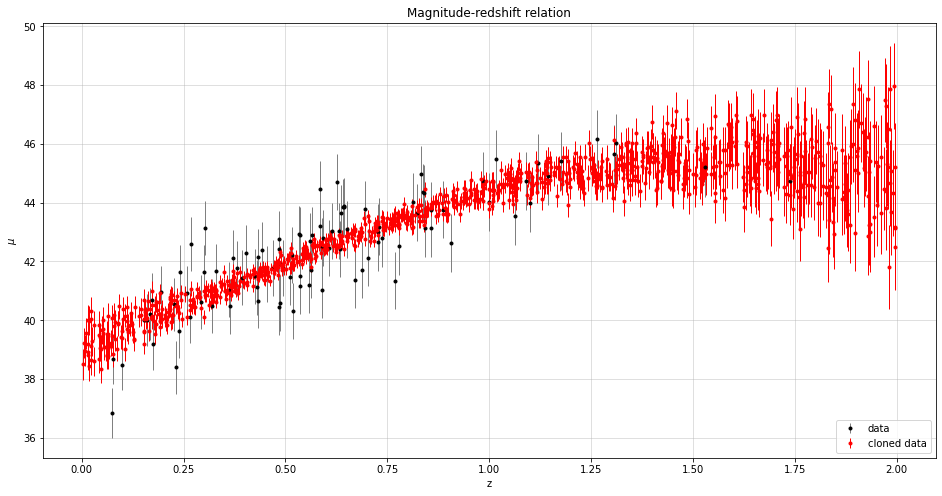

In [35]:
import random
cloned_len = int(1e3)

sampled_params = random.choices(sample, k = cloned_len)
uniform_z = np.random.uniform(0,2, cloned_len)
mu_sampled = np.array([mu_cosmo_astropy(sampled_params[i], uniform_z[i], dark_energy = True) for i in range(cloned_len)])

mu_pred, sigma = gp.predict(uniform_z.reshape(-1,1), return_std = True)

print(len(mu_pred))
mu_cloned = np.array([np.random.normal(mu_pred[i], sigma[i]) for i in range(cloned_len)])


print(mu_cloned.shape)
plt.figure(figsize=(16, 8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(uniform_z, mu_cloned[:,0], sigma, fmt='.r', ecolor='red', lw=1,label='cloned data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.grid(alpha = 0.5)
plt.title("Magnitude-redshift relation")